# Requirements

- Download "thermalImageChecker.py" from https://github.com/anonymouspaul96/Live-Thermal-Image-based-CAPTCHA/tree/main/Application and upolad it to colab. Make sure the path is "/content/thermalImageChecker.py" when running the following code.

- Download "thermal_captcha.db" from "https://github.com/anonymouspaul96/Live-Thermal-Image-based-CAPTCHA/tree/main/Application" and upload it in the colab. Make sure the path is "/content/thermal_captcha.db" when running the following code.

- Download "25.bmp" from "https://drive.google.com/file/d/1p8Of80RpzZy3Y9INi6hvLSlWfbeBLpyy/view?usp=sharing" and upload it in the colab. Make sure the path is "/content/25.bmp" when running the following code.

#**User side**
##Phase 2 from the diagram.
User-side sending the image with proper security measures with the timestamp & nonce.


In [ ]:
import hashlib
import time
import os
import json
from PIL import Image
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric.utils import Prehashed
from cryptography.hazmat.primitives import serialization
import requests
import base64

# Function to convert image to binary
def image_to_binary(image_path):
    with open(image_path, "rb") as image_file:
        return image_file.read()

# Function to add timestamp and nonce to the binary data
def add_metadata_to_binary(binary_data, timestamp, nonce):
    metadata = f"Timestamp: {timestamp}, Nonce: {nonce}"
    metadata_bytes = metadata.encode()
    return binary_data + metadata_bytes

# Generate keys (in practice, keys should be stored securely and reused)
private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048
)
public_key = private_key.public_key()

# Load image and convert to binary
image_path = "/content/25.bmp"  # Path to the image # for webcam put the link
image_binary = image_to_binary(image_path)

# Create timestamp and nonce
timestamp = time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime())
#print(f"TimeStamp : {timestamp}")
nonce = os.urandom(16).hex()
#print(f"Nonce : {nonce}")

# Add timestamp and nonce to the binary data
binary_with_metadata = add_metadata_to_binary(image_binary, timestamp, nonce)

# Hash the combined binary data with metadata
binary_hash = hashlib.sha256(binary_with_metadata).digest()

# Sign the hash
signature = private_key.sign(
    binary_hash,
    padding.PSS(
        mgf=padding.MGF1(hashes.SHA256()),
        salt_length=padding.PSS.MAX_LENGTH
    ),
    Prehashed(hashes.SHA256())
)

# Encode binary data and signature to Base64
binary_with_metadata_base64 = base64.b64encode(binary_with_metadata).decode()
signature_base64 = base64.b64encode(signature).decode()

# Print or send binary_with_metadata, signature, public_key (in a real scenario)
print("Binary with Metadata:", binary_with_metadata_base64)
print("Signature:", signature_base64)
print("Public Key:", public_key.public_bytes(encoding=serialization.Encoding.PEM, format=serialization.PublicFormat.SubjectPublicKeyInfo).decode())

## Save data for Bob's verification
# with open("image_with_metadata.bin", "wb") as file:
#     file.write(binary_with_metadata)

# with open("signature.bin", "wb") as file:
#     file.write(signature)

# with open("public_key.pem", "wb") as file:
#     file.write(public_key.public_bytes(encoding=serialization.Encoding.PEM, format=serialization.PublicFormat.SubjectPublicKeyInfo))

# Prepare payload
payload = {
    "user_IP": "127.0.0.1",
    "SiteKey": "28024d2408754883a7eff1db9cea2b00",
    "WebsiteName": "microsoft.com",
    "binary_with_metadata": binary_with_metadata_base64,
    "signature": signature_base64,
    "public_key": public_key.public_bytes(encoding=serialization.Encoding.PEM, format=serialization.PublicFormat.SubjectPublicKeyInfo).decode()
}

# Convert payload to JSON format
payload_json_from_client_to_captchaServer = json.dumps(payload)

# Simulate sending the payload (in real scenario, you would send it over a network)
print("Payload JSON:", payload_json_from_client_to_captchaServer)

# Optionally, you can send the payload using requests library to a specific endpoint
# response = requests.post("http://your-endpoint.com/api", data=payload_json, headers={'Content-Type': 'application/json'})
# print("Response from server:", response.text)
# print("Response Status Code:", response.status_code)
# print("Response Content:", response.content)


Binary with Metadata: Qk02hAMAAAAAADYAAAAoAAAAQAEAAPAAAAABABgAAAAAAACEAwATCwAAEwsAAAAAAAAAAAAAAP8kAP8iAP8gAP8bAP8ZAP8UAP8SAP8SAP8EAP4EAP4EAP4EA/0EBfwEBvwECPwEA/8ABf8ABv8ACP8ADP8ADv8AEf4AEf4AGP8AGf8AG/8AIf8AJP4AKf0AK/0ALf0AJf8CJf8CJf8CJf8CJf8CJf8CJf8CJf8CM/8AM/8AN/8AOf8APP8APv8AQP8AQv4APv8APv8APv8APv8APv8APv8APv8APv8AQv0AP/4AOv8ANP8AK/8AJv8AIf8AHf8AAPkCAP0QAP8sAP9LAP9sAP+IBf2aCfqlAP+IAP9+Af5zAv9vAf53AP+KAP+gAP+vAPnaAf/aAv/SAP/EAP21APyuAP+xAP+4CP+uAPydAPqIAPx9AP+FAP+YA/+uBPy6AP3rAP/fA//HAf+rAP+SAP+HAP+JAP+NAPnJAP/XAf/oAv/vAP7pAPrfAPzbAP/aAP7MAP/HAP/CAP/BAP/EAP/MAP/VAf7dAP/WAP/VAP/TAP7SAP7SAP/TAP/VAP/WAPveAP3VAP7KAP+9AP+3AP+1AP+4AP+5AP3ZAP3ZAP3ZAP3ZAP3ZAP3ZAP3ZAP3ZAP/XAP/aAP/gAP/mAP/tAf/0A//4BP/7APT8APf8APr5AP73AP/zAP/sAP/pAP/lAPvxAP/qAP/gAP/TAP/LAP/EAP3BAPrBAP2dAP+cA/+YA/+OAP6AAPx3AP9yAv9yAP15AP2FAP6aAP+vAP/AAP/JAP/KAP7JAP//AP//AP//AP/5AP/vAP/fAP/OAP/FAP/BAP/HAP3QAfraAfncAPjaAPjVAPjRAPvPAP3UAP/cA//nBf/uBf/0BPv3Avn3AP3zAP7yAP7xAP/vAP/sAP/qAP/oAP/oAP/FAP/BAP++AP66APy4APy2APy1Af22AP6cAP+mAP

#CAPTCHA Server Side
##Phase 3 from the diagram.
THERMAL CAPTCHA server is checking the received image and evaluating the proper security measeures. Creating token.
- To do the replay attack one can try to run the follow code multiple times.
- To do the old photo attack one wait more then 120s before running the code.

Image is: Thermal Image
User Nonce 'c8c473bb7d55bc4fcc6b640a820c214c' is not present in the database.
Message verified and accepted. Received Nonce: c8c473bb7d55bc4fcc6b640a820c214c | TimeStamp: 88.0 seconds
Received Binary Data: b'BM6\x84\x03\x00\x00\x00\x00\x006\x00\x00\x00(\x00\x00\x00@\x01\x00\x00\xf0\x00\x00\x00\x01\x00\x18\x00\x00\x00\x00\x00\x00\x84\x03\x00\x13\x0b\x00\x00\x13\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff$\x00\xff"\x00\xff \x00\xff\x1b\x00\xff\x19\x00\xff\x14\x00\xff\x12\x00\xff\x12\x00\xff\x04\x00\xfe\x04\x00\xfe\x04\x00\xfe\x04\x03\xfd\x04\x05\xfc\x04\x06\xfc\x04\x08\xfc\x04\x03\xff\x00\x05\xff\x00\x06\xff\x00\x08\xff\x00\x0c\xff\x00\x0e\xff\x00\x11\xfe\x00\x11\xfe\x00\x18\xff\x00\x19\xff\x00\x1b\xff\x00!\xff\x00$\xfe\x00)\xfd\x00+\xfd\x00-\xfd\x00%\xff\x02%\xff\x02%\xff\x02%\xff\x02%\xff\x02%\xff\x02%\xff\x02%\xff\x023\xff\x003\xff\x007\xff\x009\xff\x00<\xff\x00>\xff\x00@\xff\x00B\xfe\x00>\xff\x00>\xff\x00>\xff\x00>\xff\x00>\xff\x00>\xff\x00>\xff\x00>\x

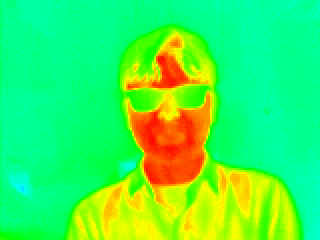

User added successfully with UserID: 63
Detection result added successfully.
User nonce added successfully.
Detections Table:
(35, 36, 100, '2024-06-26 05:04:48')
(36, 37, 100, '2024-06-26 05:05:08')
(37, 38, 100, '2024-06-26 05:05:11')
(38, 39, 100, '2024-06-26 05:06:21')
(39, 40, 100, '2024-06-26 05:06:47')
(40, 41, 100, '2024-06-26 05:12:58')
(41, 42, 100, '2024-06-26 05:14:02')
(42, 43, 100, '2024-06-26 05:14:19')
(43, 44, 100, '2024-06-26 05:15:47')
(44, 45, 100, '2024-06-26 05:16:29')
(45, 46, 100, '2024-06-26 05:17:30')
(46, 47, 100, '2024-06-26 05:17:47')
(47, 48, 100, '2024-06-26 05:18:06')
(48, 49, 100, '2024-06-26 05:18:27')
(49, 50, 100, '2024-06-26 05:19:55')
(50, 51, 100, '2024-06-26 05:24:27')
(51, 52, 100, '2024-06-26 05:24:42')
(52, 53, 100, '2024-06-26 05:25:00')
(53, 54, 100, '2024-06-26 05:26:07')
(54, 55, 100, '2024-06-26 05:27:39')
(55, 56, 100, '2024-06-26 05:27:57')
(56, 57, 100, '2024-06-26 05:28:34')
(57, 58, 100, '2024-06-26 05:35:36')
(58, 59, 100, '2024-06-

In [ ]:
import hashlib
import sqlite3
import time
from PIL import Image
import io
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric.utils import Prehashed
from cryptography.hazmat.primitives import serialization
from cryptography.exceptions import InvalidSignature
from IPython.display import display
from thermalImageChecker import is_thermal_image
import numpy as np
import cv2
import base64
import json
import os
import hmac
import datetime
import jwt
from cryptography.fernet import Fernet

SERVER_SECRET_KEY = '9a61f13c92a04010b0f87a15734673c8'.encode()  # Ensure it's in bytes

def derive_combined_key(server_key, shared_key):
    return base64.urlsafe_b64encode(hmac.new(server_key, shared_key.encode(), digestmod='sha256').digest())

def generate_token(user_id, site_key):
    expiration_time = datetime.datetime.utcnow() + datetime.timedelta(minutes=2)
    nonce = os.urandom(16).hex()
    token_payload = {
        'exp': expiration_time,
        'result_row_number': user_id,
        'SiteKey': site_key,
        'nonce': nonce
    }
    token = jwt.encode(token_payload, SERVER_SECRET_KEY, algorithm='HS256')
    return token

# def encrypt_token(token, shared_key):
#     combined_key = derive_combined_key(SERVER_SECRET_KEY, shared_key)
#     fernet_combined = Fernet(combined_key)
#     encrypted_token = fernet_combined.encrypt(token.encode())
#     return encrypted_token

def encrypt_token(token, shared_key):
    combined_key = derive_combined_key(SERVER_SECRET_KEY, shared_key)
    fernet_combined = Fernet(combined_key)

    # Check if token is a string, if so, encode it
    if isinstance(token, str):
        token = token.encode()

    encrypted_token = fernet_combined.encrypt(token)
    return encrypted_token

def add_user(site_key, website_name, user_ip):
    cursor.execute('SELECT * FROM ServerVSWebsite WHERE SiteKey = ?', (site_key,))
    if cursor.fetchone() is None:
        print("Site key does not exist.")
        return None

    cursor.execute('''
        INSERT INTO Users (SiteKey, WebsiteName, UserIPAddress)
        VALUES (?, ?, ?)
    ''', (site_key, website_name, user_ip))

    conn.commit()
    user_id = cursor.lastrowid
    print(f"User added successfully with UserID: {user_id}")
    return user_id

def add_detection(user_id, result):
    if user_id is None:
        print("Invalid user_id: cannot add detection result.")
        return

    cursor.execute('''
        INSERT INTO Detections (UserID, Result)
        VALUES (?, ?)
    ''', (user_id, result))

    conn.commit()
    print("Detection result added successfully.")

def add_user_nonce(user_id, nonce):
    cursor.execute('SELECT * FROM UserNonce WHERE Nonce = ?', (nonce,))
    if cursor.fetchone() is not None:
        print("Nonce already exists for a user.")
        return

    cursor.execute('''
        INSERT INTO UserNonce (UserID, Nonce)
        VALUES (?, ?)
    ''', (user_id, nonce))

    conn.commit()
    print("User nonce added successfully.")

def is_user_nonce_present(nonce):
    cursor.execute('SELECT * FROM UserNonce WHERE Nonce = ?', (nonce,))
    row = cursor.fetchone()
    if row:
        print(f"User Nonce '{nonce}' is present in the database.")
        return True
    else:
        print(f"User Nonce '{nonce}' is not present in the database.")
        return False

def show_all_websites():
    cursor.execute('SELECT * FROM ServerVSWebsite')
    rows = cursor.fetchall()
    print("ServerVSWebsite Table:")
    for row in rows:
        print(row)

def show_all_users():
    cursor.execute('SELECT * FROM Users')
    rows = cursor.fetchall()
    print("Users Table:")
    for row in rows:
        print(row)

def show_all_user_nonces():
    cursor.execute('SELECT * FROM UserNonce')
    rows = cursor.fetchall()
    print("UserNonce Table:")
    for row in rows:
        print(row)

def show_all_detections():
    cursor.execute('SELECT * FROM Detections')
    rows = cursor.fetchall()
    print("Detections Table:")
    for row in rows:
        print(row)

def show_table_schema(table_name):
    cursor.execute(f'PRAGMA table_info({table_name})')
    schema = cursor.fetchall()
    print(f"Schema of {table_name}:")
    for column in schema:
        print(column)

def get_shared_key_by_sitekey(site_key):
    cursor.execute('SELECT SharedKey FROM ServerVSWebsite WHERE SiteKey = ?', (site_key,))
    row = cursor.fetchone()
    if row:
        return row[0]
    else:
        print("Site key not found.")
        return None

def process_payload(payload_json):
    try:
        # Parse payload and check for required keys
        payload = json.loads(payload_json)
        required_keys = ["binary_with_metadata", "signature", "public_key", "SiteKey", "WebsiteName", "user_IP"]
        for key in required_keys:
            if key not in payload:
                raise KeyError(f"Missing required key in payload: {key}")

        binary_with_metadata_base64 = payload["binary_with_metadata"]
        signature_base64 = payload["signature"]
        public_key_base64 = payload["public_key"]
        site_key = payload["SiteKey"]
        website_name = payload["WebsiteName"]
        user_IP = payload["user_IP"]

        # Decode Base64 to binary
        received_binary_with_metadata = base64.b64decode(binary_with_metadata_base64)
        received_signature = base64.b64decode(signature_base64)
        public_key = serialization.load_pem_public_key(public_key_base64.encode())

        # Extract the metadata (timestamp and nonce)
        metadata_start = received_binary_with_metadata.rfind(b"Timestamp:")
        received_metadata = received_binary_with_metadata[metadata_start:].decode()
        received_binary = received_binary_with_metadata[:metadata_start]

        # Extract timestamp and nonce
        received_timestamp = received_metadata.split(", Nonce: ")[0].split("Timestamp: ")[1]
        received_nonce = received_metadata.split(", Nonce: ")[1]

        # First check if the received image is a thermal image or not
        image = Image.open(io.BytesIO(received_binary))
        result = is_thermal_image(image)
        if result == "Thermal Image":
            print(f"Image is: {result}")
            # conn = sqlite3.connect('thermal_captcha.db')
            # cursor = conn.cursor()

            if is_user_nonce_present(received_nonce):
                print("Message rejected: nonce has been used before.")
            else:
                # Check if the timestamp is within the acceptable range (e.g., 2 minutes)
                current_time = time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime())
                current_time_obj = time.strptime(current_time, "%Y-%m-%dT%H:%M:%SZ")
                received_time_obj = time.strptime(received_timestamp, "%Y-%m-%dT%H:%M:%SZ")

                time_difference = abs(time.mktime(current_time_obj) - time.mktime(received_time_obj))

                if time_difference > 120:
                    print(f"Message rejected: timestamp is too old. | TimeStamp: {time_difference} seconds")
                else:
                    # Hash the received binary data with metadata
                    received_binary_hash = hashlib.sha256(received_binary_with_metadata).digest()

                    # Verify the signature
                    try:
                        public_key.verify(
                            received_signature,
                            received_binary_hash,
                            padding.PSS(
                                mgf=padding.MGF1(hashes.SHA256()),
                                salt_length=padding.PSS.MAX_LENGTH
                            ),
                            Prehashed(hashes.SHA256())
                        )
                        print(f"Message verified and accepted. Received Nonce: {received_nonce} | TimeStamp: {time_difference} seconds")
                        print(f"Received Binary Data: {received_binary}")

                        image = Image.open(io.BytesIO(received_binary))
                        display(image)
                        image.save("encoded_image_only_timestamp_nonce.png")

                        user_id = add_user(site_key, website_name, user_IP)
                        if user_id is not None:
                            add_detection(user_id, 85)
                            add_user_nonce(user_id, received_nonce)

                        show_all_detections()
                        SHARED_KEY = get_shared_key_by_sitekey(site_key)
                        show_all_user_nonces()
                        # conn.close()

                        token = generate_token(user_id, site_key)
                        encrypted_token = encrypt_token(token, SHARED_KEY)
                        print(f"Generated Encrypted Token: {encrypted_token}")
                        encrypted_token_base64 = base64.b64encode(encrypted_token).decode()

                        payload = {
                            "user_IP": user_IP,
                            "SiteKey": site_key,
                            "WebsiteName": website_name,
                            "token": encrypted_token_base64
                        }

                        payload_json_from_captchaServer_to_user = json.dumps(payload)
                        print("Payload JSON:", payload_json_from_captchaServer_to_user)
                        return payload_json_from_captchaServer_to_user

                    except InvalidSignature:
                        print("Message rejected: invalid signature.")
        else:
            print(f"Rejected!!! Image is: {result}")
    except KeyError as e:
        print(e)

# Process the payload
conn = sqlite3.connect('thermal_captcha.db')
cursor = conn.cursor()
payload_json_from_captchaServer_to_user = process_payload(payload_json_from_client_to_captchaServer)
conn.close()

#User
##Phase 4 from the diagram.
User-side receives the token from Thermal-CAPTCHA-SERVER and forwards it to the website.

In [ ]:
import json
import hashlib
import requests

payload = json.loads(payload_json_from_captchaServer_to_user)
payload_json_from_user_to_website = json.dumps(payload)
print("Payload JSON:", payload_json_from_user_to_website)

Payload JSON: {"user_IP": "127.0.0.1", "SiteKey": "28024d2408754883a7eff1db9cea2b00", "WebsiteName": "microsoft.com", "token": "Z0FBQUFBQm1tWE5PVzdqVDZYeEJTWmx6TXpHQktMenRObWhONnhQbk4zbk9fSGMwczJuTnk4NHdFdU9VNGh4WTdCYWZTTk5qaGFORzFlTU5OdlNoaXlTMlpCZjZfMnJ0VVNHY0pOUkE3ektCZHpIVUxEc1Y0cVRYendnXzdKVE5VaGF5TzgzS1o4cHpmak8yTHRYY1laaURFc09OdllPRkJfZk9ZdWR3ZnNuc3hyVUJmcENuSlk5Q1BKWWMzc3Npc0tWVHdlM1YxU0pZMUtIV1lSbVhOWk5teDdUOEpwRHFlWVRqSmNQaThzc3dLQktLOHdBaGhiSXdLZDdXRnRJb0pEc05ETG9yQVZubGE4LWh5SkYySzlUVVMtQklsbW9sVHZMSlRMUFVBQjJXZTJjeExDdnRkdWJIZnBndHY5dS02bXdESEpZcU9yclZOOTRwV1BTWkcyWXBhcUhUU0FsT1BuMkxfck5FV1JsODFaX2o0blg4MUJFNlBYaWhKZjI2Y3IzZENmWUhYYWRKYUg0a0FwaU9VaG9wRDFCazJFdDlfZz09"}


#Website
#Phase 5 from the diagram.
Website received the payload with the token from user and add a additional field (its own shared key) and forward it to server

In [ ]:
import json
import hashlib
import requests

# # Received payload
# payload = {
#                     "user_IP": user_IP,
#                     "SiteKey": site_key,
#                     "WebsiteName": website_name,
#                     "token": encrypted_token_base64
#                   }

#processing payload recived from user
payload = json.loads(payload_json_from_user_to_website)
shared_key = "548c8ffd856f4d74a518a63aa9a5d9d2" ### Secrete and only used with the server to comunicate
# Add another field to the payload
payload["shared_key"] = hashlib.sha256(shared_key.encode()).hexdigest()

# Convert payload to JSON format
payload_json_from_website_to_captchaServer = json.dumps(payload)
print("Payload JSON:", payload_json_from_website_to_captchaServer)

# # Forward the payload to the server
# server_url = "http://example.com/endpoint"  # Replace with the actual server URL
# headers = {'Content-Type': 'application/json'}

# response = requests.post(server_url, data=payload_json, headers=headers)

# # Print the response from the server
# print("Response Status Code:", response.status_code)
# print("Response Content:", response.content.decode())


Payload JSON: {"user_IP": "127.0.0.1", "SiteKey": "28024d2408754883a7eff1db9cea2b00", "WebsiteName": "microsoft.com", "token": "Z0FBQUFBQm1tWE5PVzdqVDZYeEJTWmx6TXpHQktMenRObWhONnhQbk4zbk9fSGMwczJuTnk4NHdFdU9VNGh4WTdCYWZTTk5qaGFORzFlTU5OdlNoaXlTMlpCZjZfMnJ0VVNHY0pOUkE3ektCZHpIVUxEc1Y0cVRYendnXzdKVE5VaGF5TzgzS1o4cHpmak8yTHRYY1laaURFc09OdllPRkJfZk9ZdWR3ZnNuc3hyVUJmcENuSlk5Q1BKWWMzc3Npc0tWVHdlM1YxU0pZMUtIV1lSbVhOWk5teDdUOEpwRHFlWVRqSmNQaThzc3dLQktLOHdBaGhiSXdLZDdXRnRJb0pEc05ETG9yQVZubGE4LWh5SkYySzlUVVMtQklsbW9sVHZMSlRMUFVBQjJXZTJjeExDdnRkdWJIZnBndHY5dS02bXdESEpZcU9yclZOOTRwV1BTWkcyWXBhcUhUU0FsT1BuMkxfck5FV1JsODFaX2o0blg4MUJFNlBYaWhKZjI2Y3IzZENmWUhYYWRKYUg0a0FwaU9VaG9wRDFCazJFdDlfZz09", "shared_key": "6ddd7989b4916ae6a39991ac59d4081c9fa362177e502f6ecd2c6a678301efbd"}


#CAPTCHA Server
## Phase 6 from the diagram.
Captcha server again receive a payload (which includes token and website shared key), from the shared key captcha server verifies the website and decrypt the token and return the detection result for the user.
- Run the following code multiple times to replicate a replay attack.
- Run the code after 120s to check if the server accept expired tokens or not.

In [ ]:
import jwt
import hmac
import datetime
from cryptography.fernet import Fernet
import json
import base64
import sqlite3
import os
import uuid

SERVER_SECRET_KEY = '9a61f13c92a04010b0f87a15734673c8'.encode()  # Server own secret key

# Function to add a nonce for a token
def add_token_nonce2(token, nonce):
    cursor.execute('SELECT * FROM TokenNonce WHERE Nonce = ?', (nonce,))
    if cursor.fetchone() is not None:
        print("Nonce already exists for a token.")
        return

    cursor.execute('''
        INSERT INTO TokenNonce (Token, Nonce)
        VALUES (?, ?)
    ''', (token, nonce))

    conn.commit()
    print("Token nonce added successfully.")

# Function to show all entries in the TokenNonce table
def show_all_token_nonces2():
    cursor.execute('SELECT * FROM TokenNonce')
    rows = cursor.fetchall()
    print("TokenNonce Table:")
    for row in rows:
        print(row)

# Function to check if a token nonce is present in the database
def is_token_nonce_present2(nonce):
    cursor.execute('SELECT * FROM TokenNonce WHERE Nonce = ?', (nonce,))
    row = cursor.fetchone()
    if row:
        print(f"Token Nonce '{nonce}' is present in the database.")
        return True
    else:
        print(f"Token Nonce '{nonce}' is not present in the database.")
        return False

# Function to fetch the result attribute from the Detections table using userID
def get_detection_results_by_user_id2(user_id):
    cursor.execute('SELECT Result FROM Detections WHERE UserID = ?', (user_id,))
    results = cursor.fetchall()
    if results:
        print(f"Detection results for UserID {user_id}:")
        for result in results:
            risk_score = result[0]
            print(result[0])
            return risk_score
    else:
        print(f"No detection results found for UserID {user_id}")
        return None

# Function to show all entries in the Detections table
def show_all_detections2():
    cursor.execute('SELECT * FROM Detections')
    rows = cursor.fetchall()
    print("Detections Table:")
    for row in rows:
        print(row)

# Function to fetch the shared key from the ServerVSWebsite table using site key
def get_shared_key_by_sitekey2(site_key):
    cursor.execute('SELECT SharedKey FROM ServerVSWebsite WHERE SiteKey = ?', (site_key,))
    row = cursor.fetchone()
    if row:
        return row[0]
    else:
        print("Site key not found.")
        return None

def derive_combined_key2(server_key, shared_key):
    """
    Derives a combined key using HMAC with SHA-256.
    """
    return base64.urlsafe_b64encode(hmac.new(server_key, shared_key, digestmod='sha256').digest())

def decrypt_token2(encrypted_token, received_shared_key):
    """
    Decrypts the token using a combined key derived from the server and shared keys.
    """
    combined_key = derive_combined_key2(SERVER_SECRET_KEY, received_shared_key)
    fernet_combined = Fernet(combined_key)
    decrypted_token = fernet_combined.decrypt(encrypted_token).decode()
    return decrypted_token

def validate_token2(encrypted_token, received_shared_key, get_shared_key_by_sitekey_func):
    """
    Validates the token by decrypting it, checking its validity, and ensuring the nonce has not been used before.
    """
    if not hmac.compare_digest(received_shared_key, get_shared_key_by_sitekey_func):
        return False, None, "Invalid shared key"

    try:
        token = decrypt_token2(encrypted_token, received_shared_key)
        decoded = jwt.decode(token, SERVER_SECRET_KEY, algorithms=['HS256'])

        # Check if the nonce has been used before
        received_token_nonce = decoded.get('nonce')
        if is_token_nonce_present2(received_token_nonce):
            return False, None, "Replay attack detected: nonce already used"
        else:
            user_id = decoded.get('result_row_number')
            add_token_nonce2(user_id, received_token_nonce)  # UserId and tokenId are same for uniquely identify user
            return True, user_id, decoded
    except jwt.ExpiredSignatureError:
        return False, None, "Token has expired"
    except jwt.InvalidTokenError:
        return False, None, "Invalid token"
    except Exception as e:
        return False, None, str(e)

# Processing payload received from website
payload = json.loads(payload_json_from_website_to_captchaServer)
encrypted_token_base64 = payload["token"]
received_shared_key = payload["shared_key"]
site_key = payload["SiteKey"]
website_name = payload["WebsiteName"]
user_IP = payload["user_IP"]

# Decode Base64 to binary
encrypted_token = base64.b64decode(encrypted_token_base64)

conn = sqlite3.connect('thermal_captcha.db')
cursor = conn.cursor()

get_shared_key_by_sitekey_func = get_shared_key_by_sitekey2(site_key)
print(f"Shared Key for Site Key {site_key}: {get_shared_key_by_sitekey_func}")

if get_shared_key_by_sitekey_func:
    is_valid, user_id, response = validate_token2(encrypted_token, received_shared_key.encode(), get_shared_key_by_sitekey_func.encode())
    if is_valid:
        print(f"User ID: {user_id}")
        risk_score = get_detection_results_by_user_id2(user_id)
        # Token result is sending back to website
        payload_json_from_captchaServer_to_website = {
            "user_IP": user_IP,
            "SiteKey": site_key,
            "WebsiteName": website_name,
            "Risk_score": risk_score
        }
        # Convert payload to JSON format
        payload_json_from_captchaServer_to_website = json.dumps(payload_json_from_captchaServer_to_website)
        # Simulate sending the payload (in real scenario, you would send it over a network)
        print("Payload JSON:", payload_json_from_captchaServer_to_website)
    else:
        print(f"Token validation failed: {response}")
else:
    print("Failed to retrieve shared key for the site key.")

conn.close()


Shared Key for Site Key 28024d2408754883a7eff1db9cea2b00: 6ddd7989b4916ae6a39991ac59d4081c9fa362177e502f6ecd2c6a678301efbd
Token validation failed: Token has expired


#Website
##Phase 7 from the diagram.

In [ ]:
import json
import hashlib
import requests

payload = json.loads(payload_json_from_captchaServer_to_website)
site_key= payload["SiteKey"]
website_name= payload["WebsiteName"]
user_IP= payload["user_IP"]
risk_score= payload["Risk_score"]
print("User Risk score of being bot:", risk_score)

User Risk score of being bot: 85
